In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
#Load the Data
df = pd.read_csv('data/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


TV           0
radio        0
newspaper    0
sales        0
dtype: int64

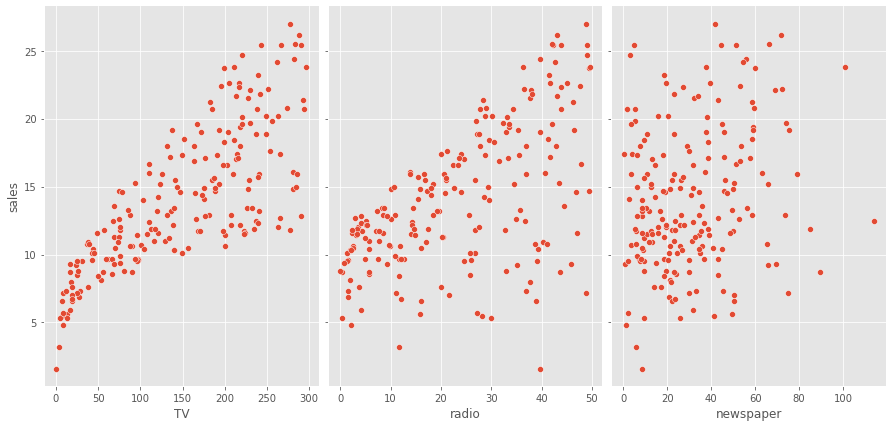

In [12]:
# Task3: Relationship between Features and Response
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=6, aspect=0.7)

In [22]:
#Task4: Multiple Linear Regression - Estimating Coefficients
from sklearn.linear_model import LinearRegression

#create X and y
feature_cols = ['TV','radio','newspaper'] #去掉目标y的那一列
X = df[feature_cols]
y = df['sales']

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X,y)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)


2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [23]:
# pair the feature names with the coefficients/就是吴恩达教程中的 ‘w’系数
list(zip(feature_cols,lm1.coef_))

[('TV', 0.04576464545539761),
 ('radio', 0.18853001691820462),
 ('newspaper', -0.0010374930424762881)]

<AxesSubplot:>

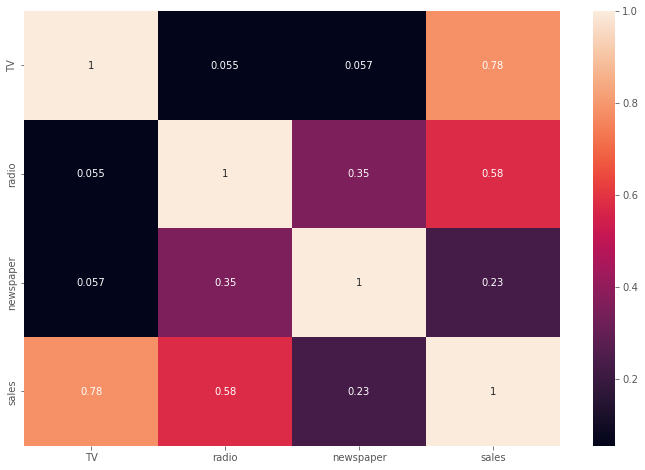

In [25]:
# 学习一下Heatmap的用法和原理
sns.heatmap(df.corr(), annot=True) 

In [27]:
#Task5: Feature Selection
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV','radio']],y)
lm2_preds = lm2.predict(X[['TV','radio']])

print("R^2:", r2_score(y,lm2_preds))

R^2: 0.8971942610828956


In [28]:
lm3 = LinearRegression().fit(X[['TV','radio','newspaper']],y)
lm3_preds = lm3.predict(X[['TV','radio','newspaper']])

print("R^2:", r2_score(y,lm3_preds))

R^2: 0.8972106381789522


### NEW Task: Model evaluation Using Train/Test Split and Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

In [ ]:
#Let's use train/test split with RMSE to see whether newspaper should be kept in the model


